In [ ]:
# Data Cleaning using 

## Happiness data cleaning

***Scope***

I have been given five csv's from consecutive years with the task to clean & merge them into one df, which will ultimately be used to build a model to predict a country's happiness score.

### Importing required libraries and reading in the datasets

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Panda df options
pd.set_option('display.max_columns', None)  
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_colwidth', None) 

# Notebook Theme
rc = {'font.size':10, 'axes.labelsize':8, 'axes.titlesize':10}
sns.set_theme(style='whitegrid', palette='Set3', rc=rc)

In [2]:
# Read in data
df_2015 = pd.read_csv('./2015.csv')
df_2016 = pd.read_csv('./2016.csv')
df_2017 = pd.read_csv('./2017.csv')
df_2018 = pd.read_csv('./2018.csv')
df_2019 = pd.read_csv('./2019.csv')

### Looking at the dataframes

In [3]:
# View no. of rows & cols for each df

print(df_2015.shape,
df_2016.shape,
df_2017.shape,
df_2018.shape,
df_2019.shape)

(158, 12) (157, 13) (155, 12) (156, 9) (156, 9)


In [4]:
print(df_2015.info(),
df_2016.info(),
df_2017.info(),
df_2018.info(),
df_2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object') Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Fre

* df_2015 contains 158 rows of data, 12 variables and has no null values
* df_2016 contains 157 rows of data, 13 variables and has no null values
* df_2017 contains 155 rows of data, 12 variables and has no null values
* df_2018 contains 156 rows of data, 9 variables and has one null value
* df_2019 contains 157 rows of data, 9 variables and has no null values

All the df's contain the variable `Generosity`

Ultimately the plan is to combine the 5 data sets into one df. To do this I will add a `Year` column into each data set to keep track of this, so we don't lose traceability of the dataframes.

In [6]:
# Add year col into each df
df_2015['Year'] = 2015

# check
df_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [7]:
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

### Looking at the indiv variables across the years
#### Happiness Score

In [8]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Happiness Score`. 

In 2018 we have a var called `Happiness.Score`. 

And in 2018 and 19 we have a var called `Score`. Lets take a look at them. 

In [9]:
df_happiness = pd.concat([df_2015['Happiness Score'], df_2016['Happiness Score'], df_2017['Happiness.Score'], df_2018['Score'], df_2019['Score']], axis=1)

df_happiness

,Happiness Score,Happiness Score,Happiness.Score,Score,Score
0,7.587,7.526,7.537,7.632,7.769
1,7.561,7.509,7.522,7.594,7.600
2,7.527,7.501,7.504,7.555,7.554
3,7.522,7.498,7.494,7.495,7.494
4,7.427,7.413,7.469,7.487,7.488
...,...,...,...,...,...
153,3.465,3.360,2.905,3.254,3.203
154,3.340,3.303,2.693,3.083,3.083
155,3.006,3.069,NaN,2.905,2.853
156,2.905,2.905,NaN,NaN,NaN


In [10]:
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Happiness Score  158 non-null    float64
 1   Happiness Score  157 non-null    float64
 2   Happiness.Score  155 non-null    float64
 3   Score            156 non-null    float64
 4   Score            156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [11]:
df_happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
Happiness Score,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
Happiness.Score,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

However we can see all of the happiness scores are floats and they range from 2.693 to 7.769

This leads me to believe they are all measured using the same SI units.

So before combining the dataframes I will rename these columns the same so they do not add in additional columns for each variation of the spelling `Happiness Score`. 

In [12]:
# Rename col names
df_2017 = df_2017.rename(columns={'Happiness.Score':'Happiness Score'})
df_2018 = df_2018.rename(columns={'Score':'Happiness Score'})
df_2019 = df_2019.rename(columns={'Score':'Happiness Score'})

#### `Country` and `Country or Region`

In [13]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country or region', 'Happiness Score',
       'GDP per capita', 'Social support', 'Hea

We can see that compared to 2015 df the following differences between the dataframes

* `Country` and `Region` in 2015 & 16
* `Country` only in 2017
* `Country or region` in 2018 & 19

In [14]:
# view no. of unique entries in each df for this variable
print(df_2015['Country'].nunique(),
df_2016['Country'].nunique(),
df_2017['Country'].nunique(),
df_2018['Country or region'].nunique(),
df_2019['Country or region'].nunique())

158 157 155 156 156


In [15]:
# view no. of regions for 2015
df_2015['Region'].nunique()

10

In [16]:
# view no. of obs in each of the 10 regions
df_2015['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

All of the values for 2018 & 2019 df's are unique, whereas you would not expect this if the region were the observation, you would expect some of the obs to repeat like we see in the 2015 df. 

Which leads me to believe the Country names only have been entered into this column. So I will rename the df's which have `Country or Region` var as `Country`

In [17]:
# Rename the cols
df_2018 = df_2018.rename(columns={'Country or region':'Country'})
df_2019 = df_2019.rename(columns={'Country or region':'Country'})

As the column now called `Country` in each data frame appears to be a unique identifier for each dataset year. 

Combined with the knowledge that some yearly datasets have fewer rows than others, this leads me to the conclusion that some countries have obs in one data set but not another.

Lets take a look.

##### 2015 vs 2016 `Country`

In [18]:
# look to see which countries are in 2015 but not in 2016
is_in_2015 = ~df_2015['Country'].isin(df_2016['Country'])
in_15_not_in_16 = df_2015.loc[is_in_2015]
in_15_not_in_16['Country']

21                         Oman
90            Somaliland region
93                   Mozambique
96                      Lesotho
100                   Swaziland
125                    Djibouti
147    Central African Republic
Name: Country, dtype: object

In [19]:
# is in 2016 but not in 2015
is_in_2016 = ~df_2016['Country'].isin(df_2015['Country'])
in_16_not_in_15 = df_2016.loc[is_in_2016]
in_16_not_in_15['Country']

14           Puerto Rico
51                Belize
75               Somalia
96     Somaliland Region
112              Namibia
142          South Sudan
Name: Country, dtype: object

We have the obs Somiland region in 2015 and Somiliand Region (with capital R) in 2016. 

When doing our analysis strings are case sensitive so I will make a note to fix this later.

In 2016 data set we have Somaliland Region and Somalia after doing a bit of research, Somaliland (or Somaliland Region) is actually an autonomous region in northern Somalia, which broke away and declared independence from Somalia in 1991.

##### 2015 vs 2017 `Country`

In [20]:
# look to see which countries are in 2015 but not in 2017
is_in_2015 = ~df_2015['Country'].isin(df_2017['Country'])
in_15_not_in_17 = df_2015.loc[is_in_2015]
in_15_not_in_17['Country']

21                  Oman
37                Taiwan
39              Suriname
71             Hong Kong
90     Somaliland region
98                  Laos
100            Swaziland
125             Djibouti
139              Comoros
Name: Country, dtype: object

In [21]:
# is in 2017 but not in 2015
is_in_2017 = ~df_2017['Country'].isin(df_2015['Country'])
in_17_not_in_15 = df_2017.loc[is_in_2017]
in_17_not_in_15['Country']

32     Taiwan Province of China
49                       Belize
70      Hong Kong S.A.R., China
92                      Somalia
110                     Namibia
146                 South Sudan
Name: Country, dtype: object

We have again the obs Hong Kong in 2015 and Hong Kong S.A.R., China) in 2017. Note made.

We're starting to see a pattern of the same countries missing in 2015, which are present in 2016 & 2017. They are Belize, Somalia, Namibia & South Sudan.

And vice versa for Oman, Swaziland & Djibouti.

##### 2015 vs 2018 `Country`

In [22]:
# look to see which countries are in 2015 but not in 2018
is_in_2015 = ~df_2015['Country'].isin(df_2018['Country'])
in_15_not_in_18 = df_2015.loc[is_in_2015]
in_15_not_in_18['Country']

21                    Oman
39                Suriname
40     Trinidad and Tobago
65            North Cyprus
90       Somaliland region
100              Swaziland
125               Djibouti
139                Comoros
Name: Country, dtype: object

In [23]:
# is in 2018 but not in 2015
is_in_2018 = ~df_2018['Country'].isin(df_2015['Country'])
in_18_not_in_15 = df_2018.loc[is_in_2018]
in_18_not_in_15['Country']

37     Trinidad & Tobago
48                Belize
57       Northern Cyprus
97               Somalia
118              Namibia
153          South Sudan
Name: Country, dtype: object

We have again some alternative spellings for a couple of countries:

* Trinidad and Tobago (2015 version) vs Trinidad & Tobago (2018)
* North Cyprus (2015) vs Northern Cyprus (2018)

We have the same pattern of some repeating countries comparing 2015 to the other datasets. They are:

* Belize, Somalia, Namibia & South Sudan - all present in 2016, 17 & 18 datasets but omitted from 2015
* Oman, Swaziland & Djibouti - present in 2015 & not present in 2016, 17 & 18.


##### 2015 vs 2019 `Country`

In [24]:
# look to see which countries are in 2015 but not in 2019
is_in_2015 = ~df_2015['Country'].isin(df_2019['Country'])
in_15_not_in_19 = df_2015.loc[is_in_2015]
in_15_not_in_19['Country']

21                    Oman
39                Suriname
40     Trinidad and Tobago
65            North Cyprus
90       Somaliland region
92               Macedonia
117                  Sudan
125               Djibouti
136                 Angola
Name: Country, dtype: object

In [25]:
# is in 2019 but not in 2015
is_in_2019 = ~df_2019['Country'].isin(df_2015['Country'])
in_19_not_in_15 = df_2019.loc[is_in_2019]
in_19_not_in_15['Country']

38     Trinidad & Tobago
63       Northern Cyprus
83       North Macedonia
111              Somalia
112              Namibia
119               Gambia
155          South Sudan
Name: Country, dtype: object

We have some alternative spellings for a couple of countries:

* Trinidad and Tobago (2015 version) vs Trinidad & Tobago (2019)
* North Cyprus (2015) vs Northern Cyprus (2019)
* Macedonia (2015) vs North Macedonia (2019) - changes its name it 2019 (after bit of research).

We have a new pattern of some repeating countries comparing 2015 dataset to the other datasets. They are:

* Somalia, Namibia & South Sudan - all present in 2016, 17, 18 & 19 datasets but omitted from 2015
* Oman & Djibouti - present in 2015 & not present in 2016, 17, 18 & 19


So just looking at the inital permutations from comparison of 2015 data set to the others we have two options:

1. We can systematically go through each permutation of the data sets and find the differences, match the spellings and delete the entire row of data for the countries which are not in the other data sets. This will lose a min of 8 observations for each row deleted
2. We keep all of the other columns of data which can be used to predict the happiness score and delete the `Country` column to eradicate this mismatching of data.

For the inital comparison from 2015 to the other data sets. This will mean we would lose the following countries:
* (from 2015 dataset) Oman, Mozambique, Lesotho, Swaziland, Djibouti, Central African Republic, Taiwan, Suriname, Somaliland Region, Laos, Comoros, Sudan & Angola
* (from 2016) Puerto Rico & Belize
* (2017) Belize
* (2018) Belize
* (2019) Gambia
* (from 2016, 17, 18 & 19) Somalia, Namibia & South Sudan

So a total of 19 rows of data from just this inital comparison from 2015 to the other data sets meaning a min of 152 other observations out of an initial 6256 probable feature obs. Admittedly it is only 2% of the data at present. However if the comparison of 2016 vs the other data sets, then 2017 vs other years and so on results in the same amout of data points lost we could potentially lose aboutr 10% of the remaining data.

Based on the above and the intuition that the name of a country wouldn't really have much effect on the Happiness Score of a company. I have elected to omit the column `Country` when combining the dataframes later.

#### `Region`

We have a column called `Region` in 2015 & 2016 dataframes only. We saw earlier that in 2018 & 2019 these were actually looking like countries not regions as you would expect (repetition for other rows of data). And finally this column is entirely omitted from the 2017 dataset. 

The fact we do not have like for like in each of the data sets and the intuition that a region name is probably not going to have much bearing on `Happiness Score` I will also omit this column when combining the data sets.

#### Happiness Rank

In [26]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Happiness Rank`. 

In 2018 we have a var called `Happiness.Rank`. 

And in 2018 and 19 we have a var called `Overall rank`. Lets take a look at them. 

In [27]:
df_rank = pd.concat([df_2015['Happiness Rank'], df_2016['Happiness Rank'], df_2017['Happiness.Rank'], df_2018['Overall rank'], df_2019['Overall rank']], axis=1)

df_rank

,Happiness Rank,Happiness Rank,Happiness.Rank,Overall rank,Overall rank
0,1,1.0,1.0,1.0,1.0
1,2,2.0,2.0,2.0,2.0
2,3,3.0,3.0,3.0,3.0
3,4,4.0,4.0,4.0,4.0
4,5,5.0,5.0,5.0,5.0
...,...,...,...,...,...
153,154,154.0,154.0,154.0,154.0
154,155,155.0,155.0,155.0,155.0
155,156,156.0,NaN,156.0,156.0
156,157,157.0,NaN,NaN,NaN


In [28]:
df_rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Happiness Rank  158 non-null    int64  
 1   Happiness Rank  157 non-null    float64
 2   Happiness.Rank  155 non-null    float64
 3   Overall rank    156 non-null    float64
 4   Overall rank    156 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.3 KB


In [29]:
df_rank.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.0,40.25,79.5,118.75,158.0
Happiness Rank,157.0,78.980892,45.466030,1.0,40.00,79.0,118.00,157.0
Happiness.Rank,155.0,78.000000,44.888751,1.0,39.50,78.0,116.50,155.0
Overall rank,156.0,78.500000,45.177428,1.0,39.75,78.5,117.25,156.0
Overall rank,156.0,78.500000,45.177428,1.0,39.75,78.5,117.25,156.0


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the happiness ranks are floats except from 2015 and they range from 1 to to the no. of rows in the data.

This leads me to believe they are all the ranks of the countries that have been observed in that df, that year and ranked according to their happiness score.

We can check this by using a scatterplot to see if there is a relationship

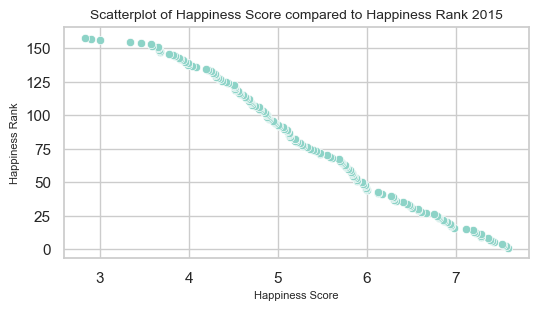

                 Happiness Score  Happiness Rank
Happiness Score         1.000000       -0.992105
Happiness Rank         -0.992105        1.000000                  Happiness Score  Happiness Rank
Happiness Score         1.000000       -0.995743
Happiness Rank         -0.995743        1.000000                  Happiness Score  Happiness.Rank
Happiness Score         1.000000       -0.992774
Happiness.Rank         -0.992774        1.000000                  Happiness Score  Overall rank
Happiness Score         1.000000     -0.991749
Overall rank           -0.991749      1.000000                  Happiness Score  Overall rank
Happiness Score         1.000000     -0.989096
Overall rank           -0.989096      1.000000


In [30]:
# scatterplot of two numerical vars
fig, ax = plt.subplots (figsize=(6,3))
ax.set(title='Scatterplot of Happiness Score compared to Happiness Rank 2015');
sns.scatterplot(data=df_2015, x='Happiness Score', y='Happiness Rank')
plt.show()

# checking for correlation between two vars
print(df_2015[['Happiness Score', 'Happiness Rank']].corr(),
     df_2016[['Happiness Score', 'Happiness Rank']].corr(),
     df_2017[['Happiness Score', 'Happiness.Rank']].corr(),
     df_2018[['Happiness Score', 'Overall rank']].corr(),
     df_2019[['Happiness Score', 'Overall rank']].corr())

This leads me to think that `Happiness Score` which is the variable we are trying to predict for actually feeds into the calculation for `Happiness Rank` this would cause data leakage.

Thinking about it chronologically we have a feature here, that we would not be able to input for future predictions of `Happiness Score`, however we could use it as a feature when predicting the `Happiness Score` of past years for countries.

My interpretation of the task set has been to make future predictions of `Happiness Scores`

Plus we already have the data for past scores we could just look it up. So based upon this I will omit this column when combining the data frames.

#### GPD per Capita

In [31]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score', 'GDP per capita',
       'Social support', 'Healthy life 

We can see in 2016 & 17 we have a variable called `Economy (GDP per Capita)`. 

In 2018 we have a var called `Economy..GDP.per.Capita.`. 

And in 2018 and 19 we have a var called `GDP per capita`. Lets take a look at them. 

In [32]:
df_econ = pd.concat([df_2015['Economy (GDP per Capita)'], df_2016['Economy (GDP per Capita)'], df_2017['Economy..GDP.per.Capita.'], df_2018['GDP per capita'], df_2019['GDP per capita']], axis=1)

df_econ

,Economy (GDP per Capita),Economy (GDP per Capita),Economy..GDP.per.Capita.,GDP per capita,GDP per capita
0,1.39651,1.44178,1.616463,1.305,1.340
1,1.30232,1.52733,1.482383,1.456,1.383
2,1.32548,1.42666,1.480633,1.351,1.488
3,1.45900,1.57744,1.564980,1.343,1.380
4,1.32629,1.40598,1.443572,1.420,1.396
...,...,...,...,...,...
153,0.22208,0.38227,0.091623,0.337,0.350
154,0.28665,0.28123,0.000000,0.024,0.026
155,0.66320,0.74719,NaN,0.091,0.306
156,0.01530,0.06831,NaN,NaN,NaN


In [33]:
df_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Economy (GDP per Capita)  158 non-null    float64
 1   Economy (GDP per Capita)  157 non-null    float64
 2   Economy..GDP.per.Capita.  155 non-null    float64
 3   GDP per capita            156 non-null    float64
 4   GDP per capita            156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [34]:
df_econ.describe().T

,count,mean,std,min,25%,50%,75%,max
Economy (GDP per Capita),158.0,0.846137,0.403121,0.0,0.545808,0.910245,1.158448,1.690420
Economy (GDP per Capita),157.0,0.953880,0.412595,0.0,0.670240,1.027800,1.279640,1.824270
Economy..GDP.per.Capita.,155.0,0.984718,0.420793,0.0,0.663371,1.064578,1.318027,1.870766
GDP per capita,156.0,0.891449,0.391921,0.0,0.616250,0.949500,1.197750,2.096000
GDP per capita,156.0,0.905147,0.398389,0.0,0.602750,0.960000,1.232500,1.684000


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the GDP's are floats and they range from 0 to to 2.096.

This leads me to believe they are all measured using the same SI units and so are comparable to each other so I will rename to match before combining the df's.

In [35]:
# Rename col names
df_2017 = df_2017.rename(columns={'Economy..GDP.per.Capita.':'Economy (GDP per Capita)'})
df_2018 = df_2018.rename(columns={'GDP per capita':'Economy (GDP per Capita)'})
df_2019 = df_2019.rename(columns={'GDP per capita':'Economy (GDP per Capita)'})

#### Family

In [36]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Social support', 'Hea

We can see in 2016, 17 & 18 we have a variable called `Family`. 

And in 2018 and 19 we have a var called `Social support`. Lets take a look at them. 

In [37]:
df_family = pd.concat([df_2015['Family'], df_2016['Family'], df_2017['Family'], df_2018['Social support'], df_2019['Social support']], axis=1)

df_family

,Family,Family,Family,Social support,Social support
0,1.34951,1.16374,1.533524,1.592,1.587
1,1.40223,1.14524,1.551122,1.582,1.573
2,1.36058,1.18326,1.610574,1.590,1.582
3,1.33095,1.12690,1.516912,1.644,1.624
4,1.32261,1.13464,1.540247,1.549,1.522
...,...,...,...,...,...
153,0.77370,0.11037,0.629794,0.608,0.517
154,0.35386,0.00000,0.000000,0.000,0.000
155,0.47489,0.14866,NaN,0.627,0.575
156,0.41587,0.23442,NaN,NaN,NaN


In [38]:
df_family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Family          158 non-null    float64
 1   Family          157 non-null    float64
 2   Family          155 non-null    float64
 3   Social support  156 non-null    float64
 4   Social support  156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [39]:
df_family.describe().T

,count,mean,std,min,25%,50%,75%,max
Family,158.0,0.991046,0.272369,0.0,0.856823,1.029510,1.214405,1.402230
Family,157.0,0.793621,0.266706,0.0,0.641840,0.841420,1.021520,1.183260
Family,155.0,1.188898,0.287263,0.0,1.042635,1.253918,1.414316,1.610574
Social support,156.0,1.213237,0.302372,0.0,1.066750,1.255000,1.463000,1.644000
Social support,156.0,1.208814,0.299191,0.0,1.055750,1.271500,1.452500,1.624000


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the GDP's are floats and they range from 0 to to 1.644

This leads me to believe they are all measured using the same SI units and so are comparable to each other so I will rename to match before combining the df's.

In [40]:
# Rename col names
df_2018 = df_2018.rename(columns={'Social support':'Family'})
df_2019 = df_2019.rename(columns={'Social support':'Family'})

#### Health (Life Expectancy)

In [41]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Healthy lif

We can see in 2016 & 17 we have a variable called `Health (Life Expectancy)`. 

In 2018 we have a var called `Health..Life.Expectancy.`. 

And in 2018 and 19 we have a var called `Healthy life expectancy`. Lets take a look at them. 

In [42]:
df_health = pd.concat([df_2015['Health (Life Expectancy)'], df_2016['Health (Life Expectancy)'], df_2017['Health..Life.Expectancy.'], df_2018['Healthy life expectancy'], df_2019['Healthy life expectancy']], axis=1)

df_health

,Health (Life Expectancy),Health (Life Expectancy),Health..Life.Expectancy.,Healthy life expectancy,Healthy life expectancy
0,0.94143,0.79504,0.796667,0.874,0.986
1,0.94784,0.86303,0.792566,0.861,0.996
2,0.87464,0.86733,0.833552,0.868,1.028
3,0.88521,0.79579,0.858131,0.914,1.026
4,0.90563,0.81091,0.809158,0.927,0.999
...,...,...,...,...,...
153,0.42864,0.17344,0.151611,0.177,0.361
154,0.31910,0.24811,0.018773,0.010,0.105
155,0.72193,0.62994,NaN,0.145,0.295
156,0.22396,0.15747,NaN,NaN,NaN


In [43]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Health (Life Expectancy)  158 non-null    float64
 1   Health (Life Expectancy)  157 non-null    float64
 2   Health..Life.Expectancy.  155 non-null    float64
 3   Healthy life expectancy   156 non-null    float64
 4   Healthy life expectancy   156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [44]:
df_health.describe().T

,count,mean,std,min,25%,50%,75%,max
Health (Life Expectancy),158.0,0.630259,0.247078,0.0,0.439185,0.696705,0.811013,1.025250
Health (Life Expectancy),157.0,0.557619,0.229349,0.0,0.382910,0.596590,0.729930,0.952770
Health..Life.Expectancy.,155.0,0.551341,0.237073,0.0,0.369866,0.606042,0.723008,0.949492
Healthy life expectancy,156.0,0.597346,0.247579,0.0,0.422250,0.644000,0.777250,1.030000
Healthy life expectancy,156.0,0.725244,0.242124,0.0,0.547750,0.789000,0.881750,1.141000


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the obs are floats and they range from 0 to to 1.141.

This leads me to believe they are all measured using the same SI units and so are comparable to each other so I will rename to match before combining the df's.

In [45]:
# Rename col names
df_2017 = df_2017.rename(columns={'Health..Life.Expectancy.':'Health (Life Expectancy)'})
df_2018 = df_2018.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'})
df_2019 = df_2019.rename(columns={'Healthy life expectancy':'Health (Life Expectancy)'})

#### Freedom

In [46]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016, 17 & 18 we have a variable called `Freedom`. 

And in 2018 and 19 we have a var called `Freedom to make life choices`. Lets take a look at them. 

In [47]:
df_freedom = pd.concat([df_2015['Freedom'], df_2016['Freedom'], df_2017['Freedom'], df_2018['Freedom to make life choices'], df_2019['Freedom to make life choices']], axis=1)

df_freedom

,Freedom,Freedom,Freedom,Freedom to make life choices,Freedom to make life choices
0,0.66557,0.57941,0.635423,0.681,0.596
1,0.62877,0.58557,0.626007,0.686,0.592
2,0.64938,0.56624,0.627163,0.683,0.603
3,0.66973,0.59609,0.620071,0.677,0.591
4,0.63297,0.57104,0.617951,0.660,0.557
...,...,...,...,...,...
153,0.59201,0.16430,0.059901,0.112,0.000
154,0.48450,0.34678,0.270842,0.305,0.225
155,0.15684,0.06912,NaN,0.065,0.010
156,0.11850,0.04320,NaN,NaN,NaN


In [48]:
df_freedom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Freedom                       158 non-null    float64
 1   Freedom                       157 non-null    float64
 2   Freedom                       155 non-null    float64
 3   Freedom to make life choices  156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [49]:
df_freedom.describe().T

,count,mean,std,min,25%,50%,75%,max
Freedom,158.0,0.428615,0.150693,0.0,0.328330,0.435515,0.549092,0.669730
Freedom,157.0,0.370994,0.145507,0.0,0.257480,0.397470,0.484530,0.608480
Freedom,155.0,0.408786,0.149997,0.0,0.303677,0.437454,0.516561,0.658249
Freedom to make life choices,156.0,0.454506,0.162424,0.0,0.356000,0.487000,0.578500,0.724000
Freedom to make life choices,156.0,0.392571,0.143289,0.0,0.308000,0.417000,0.507250,0.631000


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the obs are floats and they range from 0 to to 0.724

This leads me to believe they are all measured using the same SI units and so are comparable to each other so I will rename to match before combining the df's.

In [50]:
# Rename col names
df_2018 = df_2018.rename(columns={'Freedom to make life choices':'Freedom'})
df_2019 = df_2019.rename(columns={'Freedom to make life choices':'Freedom'})

#### Trust (Government Corruption)

In [51]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016 & 17 we have a variable called `Trust (Government Corruption)`. 

In 2018 we have a var called `Trust..Government.Corruption.`

And in 2018 and 19 we have a var called `Perceptions of corruption`. Lets take a look at them. 

In [52]:
df_trust = pd.concat([df_2015['Trust (Government Corruption)' ], df_2016['Trust (Government Corruption)'], df_2017['Trust..Government.Corruption.'], df_2018['Perceptions of corruption'], df_2019['Perceptions of corruption']], axis=1)

df_trust

,Trust (Government Corruption),Trust (Government Corruption),Trust..Government.Corruption.,Perceptions of corruption,Perceptions of corruption
0,0.41978,0.44453,0.315964,0.393,0.393
1,0.14145,0.41203,0.400770,0.340,0.410
2,0.48357,0.14975,0.153527,0.408,0.341
3,0.36503,0.35776,0.367007,0.138,0.118
4,0.32957,0.41004,0.382612,0.357,0.298
...,...,...,...,...,...
153,0.55191,0.07112,0.084148,0.106,0.025
154,0.08010,0.11587,0.056565,0.038,0.035
155,0.18906,0.17233,NaN,0.076,0.091
156,0.10062,0.09419,NaN,NaN,NaN


In [53]:
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Trust (Government Corruption)  158 non-null    float64
 1   Trust (Government Corruption)  157 non-null    float64
 2   Trust..Government.Corruption.  155 non-null    float64
 3   Perceptions of corruption      155 non-null    float64
 4   Perceptions of corruption      156 non-null    float64
dtypes: float64(5)
memory usage: 6.3 KB


In [54]:
df_trust.describe().T

,count,mean,std,min,25%,50%,75%,max
Trust (Government Corruption),158.0,0.143422,0.120034,0.0,0.061675,0.107220,0.180255,0.551910
Trust (Government Corruption),157.0,0.137624,0.111038,0.0,0.061260,0.105470,0.175540,0.505210
Trust..Government.Corruption.,155.0,0.123120,0.101661,0.0,0.057271,0.089848,0.153296,0.464308
Perceptions of corruption,155.0,0.112000,0.096492,0.0,0.051000,0.082000,0.137000,0.457000
Perceptions of corruption,156.0,0.110603,0.094538,0.0,0.047000,0.085500,0.141250,0.453000


The null values seen are because there are 158 obs for this score in 2015 and less obs in the other data frames.

We can see all of the obs are floats and they range from 0 to to 0.55191

This leads me to believe they are all measured using the same SI units and so are comparable to each other so I will rename to match before combining the df's.

In [55]:
# Rename col names
df_2017 = df_2017.rename(columns={'Trust..Government.Corruption.':'Trust (Government Corruption)'})
df_2018 = df_2018.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'})
df_2019 = df_2019.rename(columns={'Perceptions of corruption':'Trust (Government Corruption)'})

#### Missing Values

We saw earlier that df_2018 has one missing value in `Perceptions of corruption` which is now `Trust (Government Corruption`

In [56]:
# look at the entry
df_2018[df_2018['Trust (Government Corruption)'].isna()]

,Overall rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [57]:
# get values for UAE over the years
Trust_15 = pd.Series(df_2015[df_2015['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_16 = pd.Series(df_2016[df_2016['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_17 = pd.Series(df_2017[df_2017['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)
Trust_19 = pd.Series(df_2019[df_2019['Country']=='United Arab Emirates']['Trust (Government Corruption)']).reset_index(drop=True)

UAE_trust = pd.DataFrame({'2015':Trust_15, '2016':Trust_16, '2017':Trust_17 ,'2018':0, '2019':Trust_19})
UAE_trust = UAE_trust.T.reset_index()
# UAE_trust

# Rename col names
UAE_trust.rename(columns={ UAE_trust.columns[0]: 'Year', UAE_trust.columns[1]: 'Trust',}, inplace = True)
UAE_trust

,Year,Trust
0,2015,0.38583
1,2016,0.35561
2,2017,0.32449
3,2018,0.00000
4,2019,0.18200


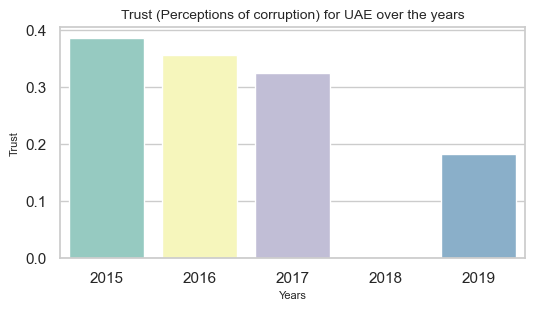

In [58]:
# plot UAE trust
fig, ax = plt.subplots (figsize=(6,3))
sns.barplot(data=UAE_trust, x='Year', y='Trust')
ax.set(xlabel='Years', ylabel='Trust', title='Trust (Perceptions of corruption) for UAE over the years', xticklabels=['2015', '2016', '2017', '2018', '2019']);

We can see here there is a downward trend in the years for Trust for UAE over the years in pretty much a straight line. 

So to impute a realistic value for this missing value we can find the equation of this line and then pop in the year 2018.

In [59]:
# eqn of stright line (y = mx + c)
# Define the known x and y points (make sure you don't include the col with the missing co-ords)
x_points = [2015, 2016, 2017, 2019]
y_points = [0.38583, 0.35561, 0.32449, 0.182]

# Calculate the coefficients m & c (you can use this for higher degrees of polynomials thats what the 1 is)
coefficients = np.polyfit(x_points, y_points, 1)

# Print the findings & eqn of stright line
print('m =', coefficients[0])
print('c =', coefficients[1])
print(f'The eqn of the stright line is y = {coefficients[0].round(3)}x + {coefficients[1].round(3)} (to 3 d.p.)')

m = -0.05157571428569167
c = 104.32730428566863
The eqn of the stright line is y = -0.052x + 104.327 (to 3 d.p.)


In [60]:
# pop in 2018 for x
(-0.05157571428569167*2018) + 104.32730428566863

0.2475128571428371

In [61]:
# impute the missing value for 2018
df_2018['Trust (Government Corruption)'].fillna(0.2475128571428371, inplace=True)

#### Dystopia Residual

In [62]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

We can see in 2016 & 17 we have a variable called `Dystopia Residual`. 

In 2018 we have a var called `Dystopia.Residual`. 

And in 2018 and 19 this variable is missing (nothing comparable) so I will omit this variable when combining df's later

#### Standard error, LCI, UCI, Whisker.high, Whisker.low

In [63]:
print(df_2015.columns,
df_2016.columns,
df_2017.columns,
df_2018.columns,
df_2019.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object') Index(['Country', 'Happiness.Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia.Residual', 'Year'],
      dtype='object') Index(['Overall rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Lif

* 2015 contains `Standard Error`
* 2016 contains `Lower Confidence Interval` & `Upper Confidence Interval`
* 2017 contains `Whisker.high` & `Whisker.low`

And in 2018 and 19 this variable is missing (nothing comparable) so I will omit this variable as well when combining df's

### Combining the df's

As mentioned earlier some of the data sets contain the columns `Region`, `Standard Error`, `Lower Confidence Interval`, `Upper Confidence Interval`, `Whisker.high`, `Whisker.low` & `Dystopia`, whilst other data sets do not have these columns or something comparable. So I will remove these columns so we do not have null values in the combined datasets for these obs for these columns.

We also decided to omit the column `Country` & `Happiness Rank` as explained earlier.

When we stack the data sets on top of each other, I imagine we will need the same column names in the same order so we don't stack the columns incorrectly. I will use the 2015 data set as a template for re-arranging the columns in the other data sets. I will move the new column `Year` to the first column. I will also move the variable we are going to predict (the label) to the rightmost column, just to help with coding it to seperate out later when required, (so it's iloc will be -1).

In [64]:
# look at the order of cols for 2015 template
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [65]:
# re-order the columns 
df_2015_a = df_2015.iloc[:,[12,5,6,7,8,9,10,3]]
df_2015_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
153,2015,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,3.465
154,2015,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.340
155,2015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,3.006
156,2015,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,2.905


In [66]:
# locate column index
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [67]:
# re-order the cols
df_2016_a = df_2016.iloc[:,[13,6,7,8,9,10,11,3]]
df_2016_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2016,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,7.526
1,2016,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,7.509
2,2016,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,7.501
3,2016,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,7.498
4,2016,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,7.413
...,...,...,...,...,...,...,...,...
152,2016,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,3.484
153,2016,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,3.360
154,2016,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,3.303
155,2016,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,3.069


In [68]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [69]:
df_2017_a = df_2017.iloc[:,[12,5,6,7,8,10,9,2]]
df_2017_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2017,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,7.537
1,2017,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,7.522
2,2017,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,7.504
3,2017,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,7.494
4,2017,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,7.469
...,...,...,...,...,...,...,...,...
150,2017,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,3.471
151,2017,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,3.462
152,2017,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,3.349
153,2017,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,2.905


In [70]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Overall rank                   156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [71]:
df_2018_a = df_2018.iloc[:,[9,3,4,5,6,8,7,2]]
df_2018_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2018,1.305,1.592,0.874,0.681,0.393,0.202,7.632
1,2018,1.456,1.582,0.861,0.686,0.340,0.286,7.594
2,2018,1.351,1.590,0.868,0.683,0.408,0.284,7.555
3,2018,1.343,1.644,0.914,0.677,0.138,0.353,7.495
4,2018,1.420,1.549,0.927,0.660,0.357,0.256,7.487
...,...,...,...,...,...,...,...,...
151,2018,0.442,1.073,0.343,0.244,0.064,0.083,3.355
152,2018,0.455,0.991,0.381,0.481,0.097,0.270,3.303
153,2018,0.337,0.608,0.177,0.112,0.106,0.224,3.254
154,2018,0.024,0.000,0.010,0.305,0.038,0.218,3.083


In [72]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Overall rank                   156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [73]:
df_2019_a = df_2019.iloc[:,[9,3,4,5,6,8,7,2]]
df_2019_a

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2019,1.340,1.587,0.986,0.596,0.393,0.153,7.769
1,2019,1.383,1.573,0.996,0.592,0.410,0.252,7.600
2,2019,1.488,1.582,1.028,0.603,0.341,0.271,7.554
3,2019,1.380,1.624,1.026,0.591,0.118,0.354,7.494
4,2019,1.396,1.522,0.999,0.557,0.298,0.322,7.488
...,...,...,...,...,...,...,...,...
151,2019,0.359,0.711,0.614,0.555,0.411,0.217,3.334
152,2019,0.476,0.885,0.499,0.417,0.147,0.276,3.231
153,2019,0.350,0.517,0.361,0.000,0.025,0.158,3.203
154,2019,0.026,0.000,0.105,0.225,0.035,0.235,3.083


In [74]:
# Stack the DataFrames on top of each other now the columns match the same order, drop the old index as will be out of sequence and set new row index
df = pd.concat([df_2015_a, df_2016_a, df_2017_a, df_2018_a, df_2019_a], axis=0)
df.reset_index(drop=True, inplace=True)
df

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,2019,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334
778,2019,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231
779,2019,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203
780,2019,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,3.083


In [66]:
# Check origonal sum of rows matched no of rows in combined df
158 + 157 + 155 + 156 + 156

782

In [76]:
# Check for missing values
df.isna().sum()

Year                             0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Happiness Score                  0
dtype: int64

In [77]:
df['Happiness Score'].describe()

count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: Happiness Score, dtype: float64

In [78]:
# Print skew of a variable 
df['Happiness Score'].skew()

0.035859433273691114

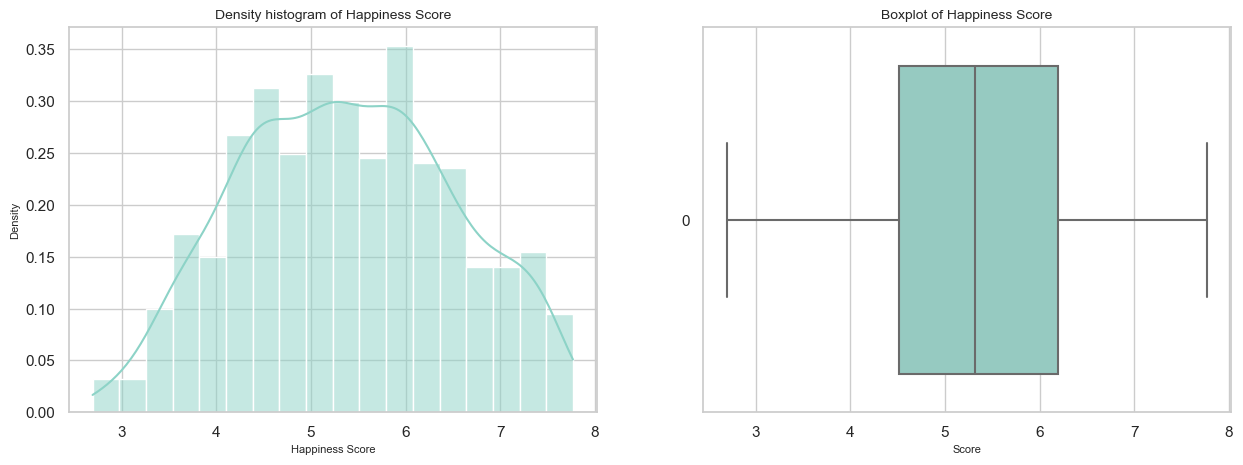

In [79]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Happiness Score'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Happiness Score'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Happiness Score')
ax[1].set(title = 'Boxplot of Happiness Score', xlabel = 'Score', ylabel = ' ');

`Happiness Score` appears to be fairly normally distributed. There is a 'cliff edge' present at the uppermost value of 7.769 where the tail drops off quickly. This usually indicates and underlying reason for this cut off, either the scores only go to this value or there is a limit put on place in the underlying data which limits this value to but cut off at this point. The peak is at at about 5.

The skew is less than -1 so not considered skewed (by general rule of thumb)

The boxplot shows us the median is at 5.322 and the data is assymetric but not clearly left or right skew as the left whisker is longer than the right, and the right box is slightly wider than the left.

The boxplot also shows us that there are no outliers in the distribution.

Because the dependant variable is fairly normally distributed and continous, I would probably choose my first model to be a multiple linear regression model.

#### Features - Economy (GDP per Capita)

In [80]:
df['Economy (GDP per Capita)'].describe()

count    782.000000
mean       0.916047
std        0.407340
min        0.000000
25%        0.606500
50%        0.982205
75%        1.236187
max        2.096000
Name: Economy (GDP per Capita), dtype: float64

In [81]:
# Print skew of a variable 
df['Economy (GDP per Capita)'].skew()

-0.3185805094075457

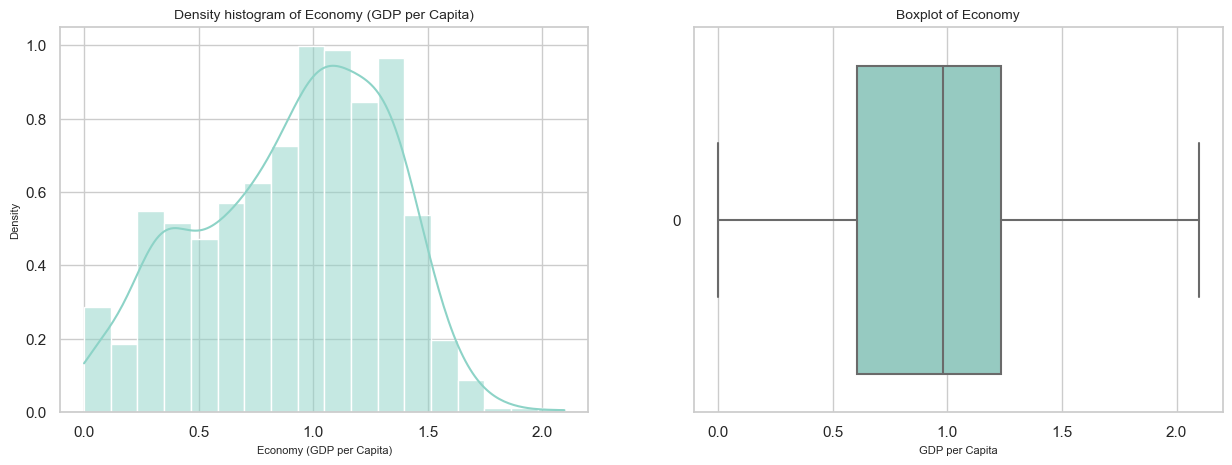

In [82]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Economy (GDP per Capita)'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Economy (GDP per Capita)'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Economy (GDP per Capita)')
ax[1].set(title = 'Boxplot of Economy', xlabel = 'GDP per Capita', ylabel = ' ');

From the graph `Economy (GDP per Capita)` appears to be multimodal. There is also another 'cliff edge' present at the lowest value of 0 where the tail drops off quickly. This makes sense as you would not expect there to be a negative GDP . The peak is at at about 1. But there is another rise present at about 0.3.

The skew is less than -1 so not considered overly skewed

The boxplot shows us the median is at 0.98 and the data is assymetric.

The boxplot also shows us that there are no outliers in the distribution.

#### Features - Family

In [83]:
df['Family'].describe()

count    782.000000
mean       1.078392
std        0.329548
min        0.000000
25%        0.869363
50%        1.124735
75%        1.327250
max        1.644000
Name: Family, dtype: float64

In [84]:
# Print skew of a variable
df['Family'].skew()

-0.6846322897626194

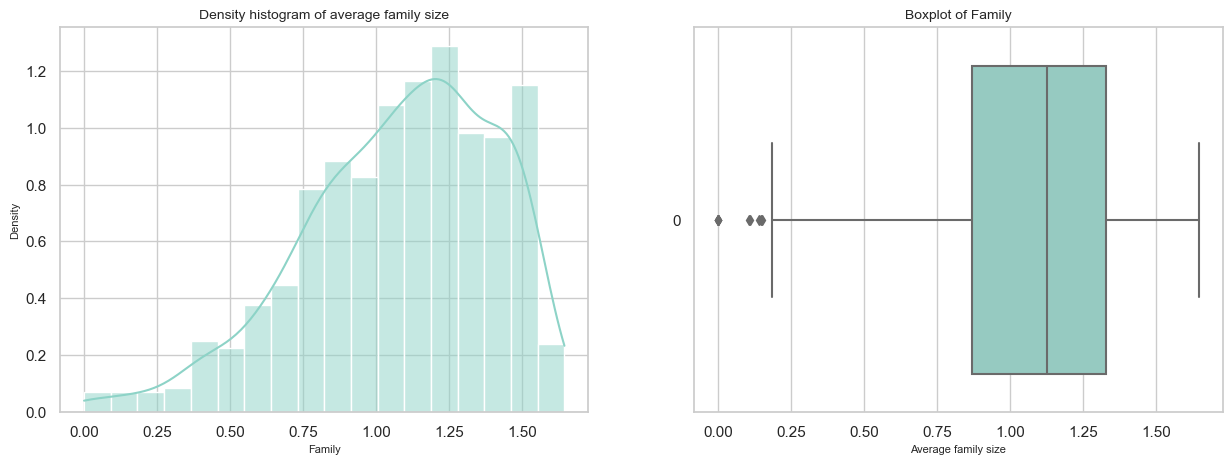

In [85]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Family'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Family'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of average family size')
ax[1].set(title = 'Boxplot of Family', xlabel = 'Average family size', ylabel = ' ');

`Family` appears to be fairly negatively skewed. There is a another 'cliff edge' present at the highest value of 1.644 where the tail drops off quickly. This is interesting it could be because it's an average . The peak is at at about 1.

The skew is less than -1 so not overly negatively skewed.

The boxplot shows us the median is at 1.12 and the data appears to be left skewed (negatively skewed), as the both the left whisker and box are longer than the RHS box & whisker.

The boxplot also shows us that there are also outliers in the distribution. Lets take a look at them.

In [86]:
# Calc outliers for Family
family_q1 = df['Family'].quantile(0.25)
family_q3 = df['Family'].quantile(0.75)

family_iqr = family_q3 - family_q1

family_lwr_bound = family_q1 - 1.5*family_iqr
family_upp_bound = family_q3 + 1.5*family_iqr

# identify outliers
family_outliers = (df['Family'] < family_lwr_bound) | (df['Family'] > family_upp_bound)

family_outliers.sum()

10

In [87]:
df[family_outliers]

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
147,2015,0.07850,0.00000,0.066990,0.488790,0.082890,0.238350,3.678
157,2015,0.20868,0.13995,0.284430,0.364530,0.107310,0.166810,2.839
289,2016,0.08709,0.14700,0.293640,0.414300,0.075640,0.309680,4.156
310,2016,0.39499,0.10419,0.210280,0.397470,0.066810,0.201800,3.484
311,2016,0.38227,0.11037,0.173440,0.164300,0.071120,0.312680,3.360
312,2016,0.28123,0.00000,0.248110,0.346780,0.115870,0.175170,3.303
313,2016,0.74719,0.14866,0.629940,0.069120,0.172330,0.483970,3.069
469,2017,0.00000,0.00000,0.018773,0.270842,0.056565,0.280876,2.693
624,2018,0.02400,0.00000,0.010000,0.305000,0.038000,0.218000,3.083
780,2019,0.02600,0.00000,0.105000,0.225000,0.035000,0.235000,3.083


Here we can see the 10 outliers. All of them are in the first quartile for Happiness Score (2.693 to 4.509750).

5 obs have a zero value for family. This does not make sense. So I will impute these values with the average family size of countries with a Happiness Score of 4.509750 or below. I chose to use the the median as the data is showing signs of skew.

In [88]:
# create a subset of Happiness Score Q1
q1_happ = df[df['Happiness Score'] <= 4.509750]

# obtain median family size for this quantile
q1_happ['Family'].median()

0.85094

In [89]:
# replace values of 0 in df
df['Family'].replace(0, 0.85094, inplace=True)

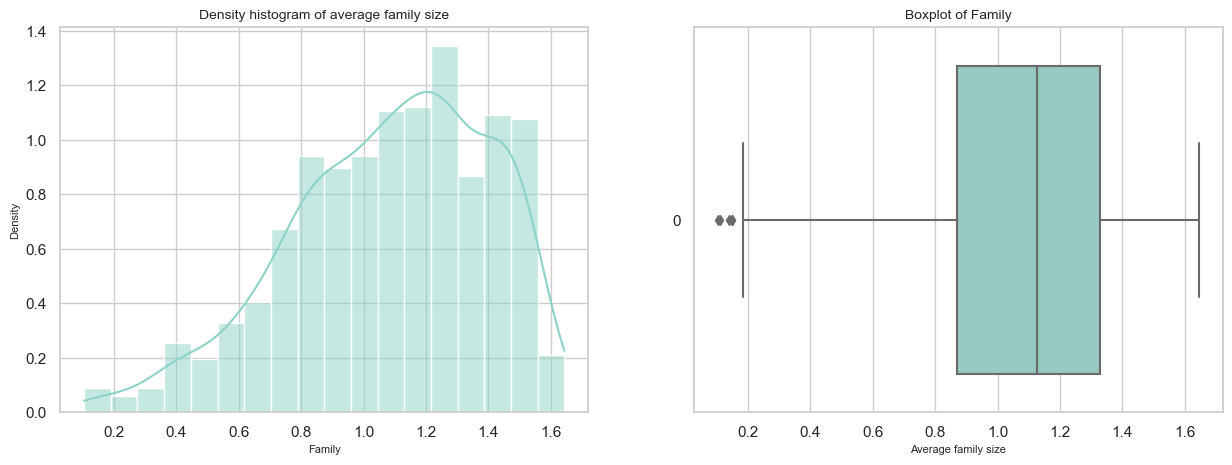

In [90]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Family'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Family'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of average family size')
ax[1].set(title = 'Boxplot of Family', xlabel = 'Average family size', ylabel = ' ');

The data is still showing as negatively skewed as it's not just the outlier lowest obs causing this skew, however we now have only 5 outliers in our data and these seem feasible. 

To enhance linearity...

#### Features - Health (Life Expectancy)

In [91]:
df['Health (Life Expectancy)'].describe()

count    782.000000
mean       0.612416
std        0.248309
min        0.000000
25%        0.440183
50%        0.647310
75%        0.808000
max        1.141000
Name: Health (Life Expectancy), dtype: float64

In context `Life Expectancy` should be in years, so perhaps this data has been standardised? 

However the median family size of 1.12 looks plausible

It looks to me like the data should be multiplied by 100 as an average life expectancy of 61 looks plausible so I will do this.

In [92]:
df['Health (Life Expectancy)'] = df['Health (Life Expectancy)'].multiply(100)

In [93]:
# Print skew of a variable
df['Health (Life Expectancy)'].skew()

-0.5012025621921571

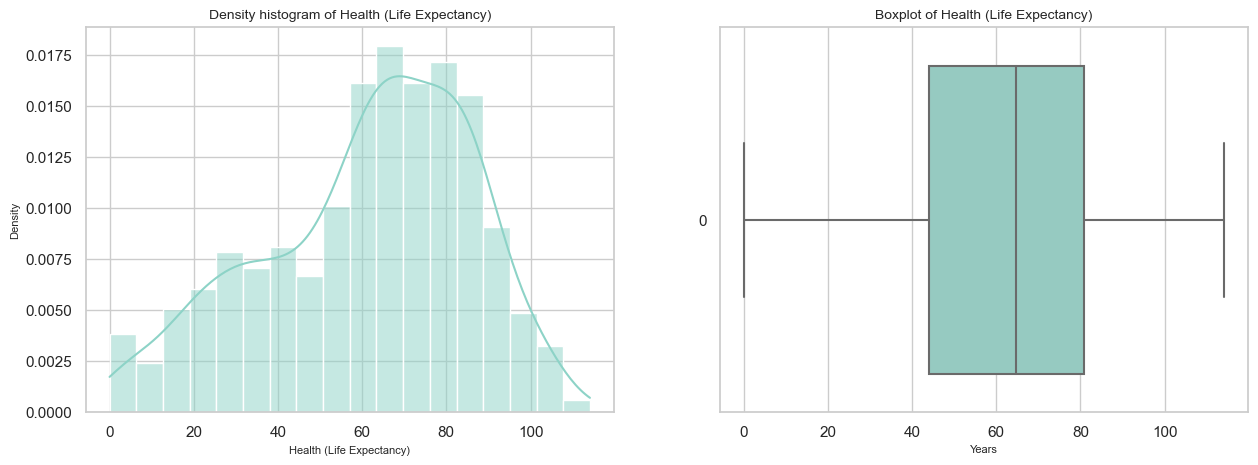

In [94]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Health (Life Expectancy)'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Health (Life Expectancy)'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Health (Life Expectancy)')
ax[1].set(title = 'Boxplot of Health (Life Expectancy)', xlabel = 'Years', ylabel = ' ');

`Health (Life Expectancy)` appears to be fairly negativly skewed. There is a another 'cliff edge' present at the lowest value of 0 where the tail drops off quickly. This makes sense as you would not expect there to be a negative age . The peak is at at about 61.

The skew is less than -1 so not considered overly skewed (by general rule of thumb)

The boxplot shows us the median is at 65 years and the data is left skewed (negatively skewed).

The boxplot also shows us that there are no outliers in the distribution.

#### Features - Freedom

In [95]:
df

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,2019,0.35900,0.71100,61.400,0.55500,0.41100,0.21700,3.334
778,2019,0.47600,0.88500,49.900,0.41700,0.14700,0.27600,3.231
779,2019,0.35000,0.51700,36.100,0.00000,0.02500,0.15800,3.203
780,2019,0.02600,0.85094,10.500,0.22500,0.03500,0.23500,3.083


Freedom appears to be the average %age of citizens who have freedom to make life choices. The higher the percentage, the higher the Happinness Score which makes sense.

In [96]:
df['Freedom'].describe()

count    782.000000
mean       0.411091
std        0.152880
min        0.000000
25%        0.309768
50%        0.431000
75%        0.531000
max        0.724000
Name: Freedom, dtype: float64

In [97]:
# Print skew of a variable
df['Freedom'].skew()

-0.5212591254144608

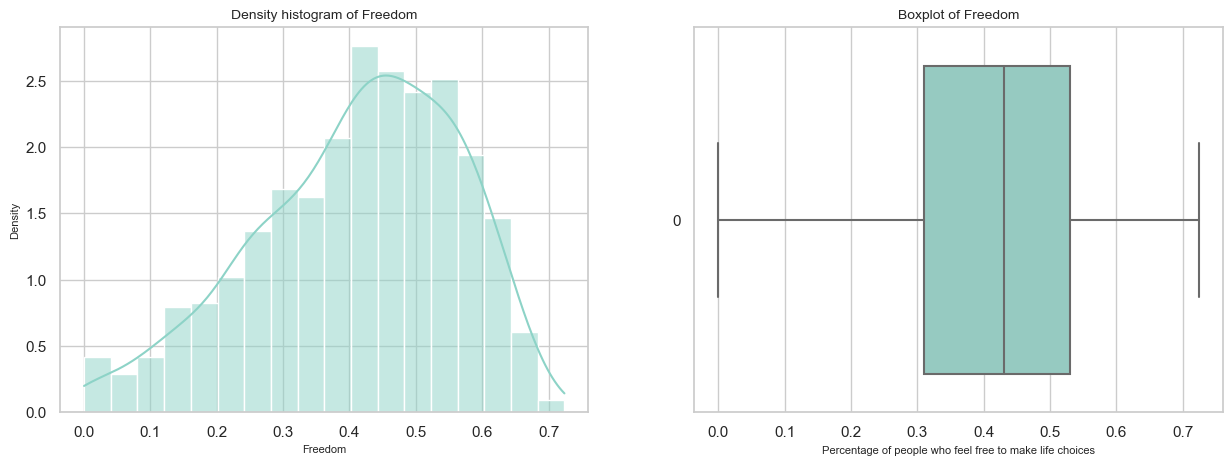

In [98]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Freedom'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Freedom'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Freedom')
ax[1].set(title = 'Boxplot of Freedom', xlabel = 'Percentage of people who feel free to make life choices', ylabel = ' ');

`Freedom` appears to be fairly negatively skewed. The peak is at at about 41%.

The skew is less than -1 so not considered overly skewed (by general rule of thumb).

The boxplot shows us the median is at 43% and the data is left skewed (negatively skewed).

The boxplot also shows us that there are no outliers in the distribution.

In [99]:
df.columns

Index(['Year', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Happiness Score'],
      dtype='object')

#### Features - Trust (Government Corruption)

In [100]:
df

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,2019,0.35900,0.71100,61.400,0.55500,0.41100,0.21700,3.334
778,2019,0.47600,0.88500,49.900,0.41700,0.14700,0.27600,3.231
779,2019,0.35000,0.51700,36.100,0.00000,0.02500,0.15800,3.203
780,2019,0.02600,0.85094,10.500,0.22500,0.03500,0.23500,3.083


In [101]:
df['Trust (Government Corruption)'].describe()

count    782.000000
mean       0.125592
std        0.105839
min        0.000000
25%        0.054250
50%        0.091033
75%        0.156243
max        0.551910
Name: Trust (Government Corruption), dtype: float64

Trust appears to be the average %age of citizens who perceive government corruption. There doesn't seem to be an obvious pattern in the data compared to Happiness Score. It could be quite a subjective matter where although people are happy, they do feel their goverment is corrupted. It will be interesting to see the bivariate analysis on Trust vs Happiness Score later.

In [102]:
# Print skew of a variable
df['Trust (Government Corruption)'].skew()

1.515509416061898

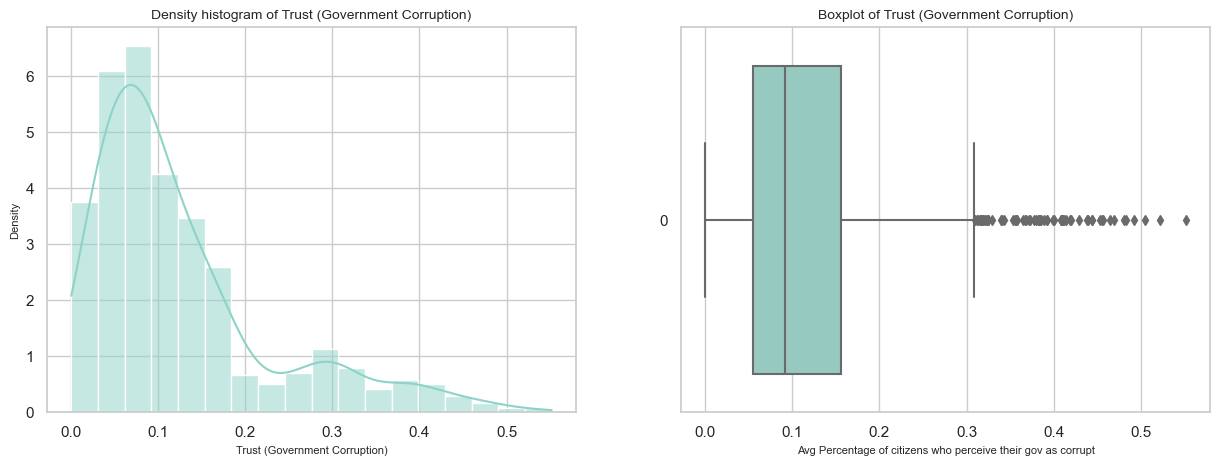

In [103]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Trust (Government Corruption)'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Trust (Government Corruption)'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Trust (Government Corruption)')
ax[1].set(title = 'Boxplot of Trust (Government Corruption)', xlabel = 'Avg Percentage of citizens who perceive their gov as corrupt', ylabel = ' ');

`Trust (Government Corruption)` appears to be positively skewed. There is a another 'cliff edge' present at the lowest value of 0 where the tail drops off quickly. This makes sense as you would not expect there to be negative %age of citizens . The peak is at at about 13%.

The skew is greater than 1 so is considered highly positively skewed.

The boxplot shows us the median is at roughly 9% and the and the data is right skewed (positively skewed), as the both the right whisker and box are longer than the LHS box & whisker..

The boxplot also shows us that there are a no. outliers in the distribution.

In [104]:
# Calc outliers for Trust
trust_q1 = df['Trust (Government Corruption)'].quantile(0.25)
trust_q3 = df['Trust (Government Corruption)'].quantile(0.75)

trust_iqr = trust_q3 - trust_q1

trust_lwr_bound = trust_q1 - 1.5*trust_iqr
trust_upp_bound = trust_q3 + 1.5*trust_iqr

# identify outliers
trust_outliers = (df['Trust (Government Corruption)'] < trust_lwr_bound) | (df['Trust (Government Corruption)'] > trust_upp_bound)

trust_outliers.sum()

67

In [105]:
df[trust_outliers].describe()

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2016.582090,1.304790,1.219011,81.856506,0.585897,0.388576,0.313152,6.670224
std,1.426473,0.428113,0.327613,19.632890,0.075520,0.057994,0.101888,1.207016
min,2015.000000,0.000000,0.192490,11.466000,0.310480,0.310000,0.055470,3.334000
25%,2015.000000,1.325885,1.068390,79.380276,0.567285,0.340500,0.255460,6.491500
50%,2016.000000,1.420000,1.285480,86.100000,0.596090,0.383000,0.290549,7.284000
75%,2018.000000,1.528165,1.508956,92.928000,0.634196,0.419410,0.363810,7.474500
max,2019.000000,1.870766,1.601000,114.100000,0.686000,0.551910,0.519120,7.769000


Here we can see the 67 outliers numerical summary. They range from 31% to 55% (rounded to nearest percent). So they are all in the uppermost values. However these values do seem plausible for now.

#### Features - Generosity

In [106]:
df['Generosity'].describe()

count    782.000000
mean       0.218576
std        0.122321
min        0.000000
25%        0.130000
50%        0.201982
75%        0.278832
max        0.838075
Name: Generosity, dtype: float64

In [107]:
df

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,2015,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,7.587
1,2015,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,7.561
2,2015,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,7.527
3,2015,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,7.522
4,2015,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...
777,2019,0.35900,0.71100,61.400,0.55500,0.41100,0.21700,3.334
778,2019,0.47600,0.88500,49.900,0.41700,0.14700,0.27600,3.231
779,2019,0.35000,0.51700,36.100,0.00000,0.02500,0.15800,3.203
780,2019,0.02600,0.85094,10.500,0.22500,0.03500,0.23500,3.083


`Generosity` appears to be the average %age of citizens who perceive themselves (or possibly the governemnt) as generous. Briefly looking at the data above it appears the countries with higher values have higher happiness scores, but we can take a look in bivariate analysis later.

In [108]:
# Print skew of a variable
df['Generosity'].skew()

1.0443600152578012

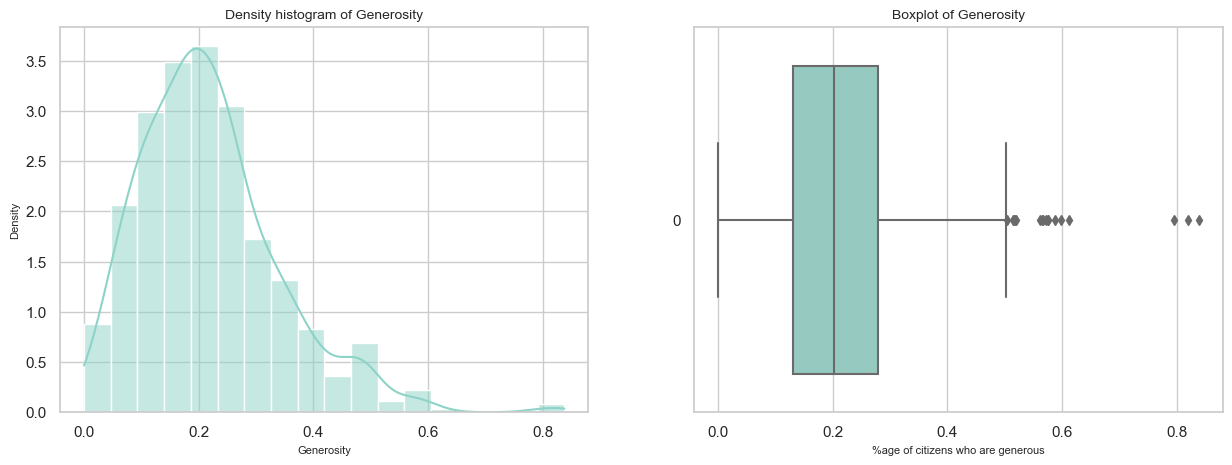

In [109]:
# plot freq histogram & boxplot in seaborn
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['Generosity'], bins=18, ax=ax[0], stat='density', kde=True)
sns.boxplot(df['Generosity'], ax=ax[1], orient='h')
# Set plot titles after drawing the graphs to overwrite existing lables
ax[0].set_title('Density histogram of Generosity')
ax[1].set(title = 'Boxplot of Generosity', xlabel = '%age of citizens who are generous', ylabel = ' ');

`Generosity` appears to be positively skewed. There is a another 'cliff edge' present at the lowest value of 0 where the tail drops off quickly. This makes sense as you would not expect there to be negative %age of citizens . The peak is at at about 22%.

The skew is greater than 1 so is considered positively skewed.

The boxplot shows us the median is at roughly 20% and the and the data is right skewed (positively skewed).

The boxplot also shows us that there are a no. outliers in the distribution.

In [110]:
# Calc outliers for Generosity
gen_q1 = df['Generosity'].quantile(0.25)
gen_q3 = df['Generosity'].quantile(0.75)

gen_iqr = gen_q3 - gen_q1

gen_lwr_bound = gen_q1 - 1.5*gen_iqr
gen_upp_bound = gen_q3 + 1.5*gen_iqr

# identify outliers
gen_outliers = (df['Generosity'] < gen_lwr_bound) | (df['Generosity'] > gen_upp_bound)

gen_outliers.sum()

17

In [111]:
df[gen_outliers]

,Year,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
20,2015,1.266370,1.285480,90.943000,0.596250,0.320670,0.519120,6.867
33,2015,0.966900,1.265040,73.850000,0.556640,0.031870,0.576300,6.455
36,2015,1.207400,1.302030,88.721000,0.603650,0.135860,0.517520,6.302
73,2015,0.828270,1.087080,63.793000,0.466110,0.000000,0.515350,5.399
90,2015,0.188470,0.951520,43.873000,0.465820,0.399280,0.503180,5.057
128,2015,0.271080,0.709050,48.246000,0.440170,0.190340,0.795880,4.307
187,2016,1.307820,1.098790,80.315000,0.549940,0.175540,0.562370,6.488
190,2016,1.089300,1.044770,64.915000,0.495530,0.028330,0.586960,6.474
236,2016,0.951040,0.876250,49.374000,0.392370,0.003220,0.565210,5.314
254,2016,0.255580,0.758620,33.108000,0.391300,0.367940,0.514790,5.057


In [112]:
df['Happiness Score'].describe()

count    782.000000
mean       5.379018
std        1.127456
min        2.693000
25%        4.509750
50%        5.322000
75%        6.189500
max        7.769000
Name: Happiness Score, dtype: float64

Here we can see the 17 outliers. They range from 50% to 84% (rounded to nearest percent). So they are all in the uppermost values. These values do seem plausible for now. The associated Happiness rank scores vary quite a bit in this data. Some are in Happiness Scores Q1, Q2 & Q3's. So again interesting to see what we get when comparing these two variables. The outlier affect about 2% of all the data so may not have a huge impact.

#### Features - Years

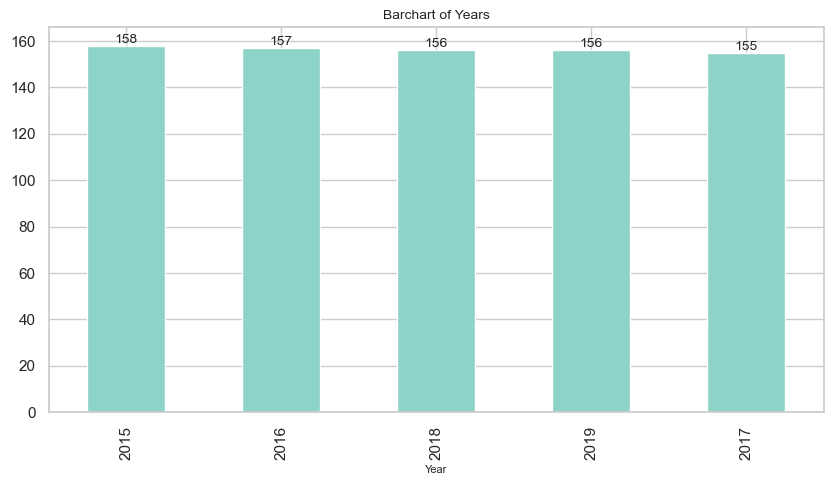

In [113]:
# print barchart of years

fig, ax = plt.subplots(figsize=(10, 5))
ax = df['Year'].value_counts().plot(kind='bar')
ax.set(title = 'Barchart of Years', xlabel = 'Year', ylabel = '')
# to add the total of each level on top of bar in text
for i in ax.containers:
    ax.bar_label(i);

Although `Years` has numerical values it is catagorical with the 5 levels being the year the obs was taken in. This graph shows the no. of obs taken in each year. We have fairly even proportions of data for each year. It will be interesting to see how Happiness Scores have changed over the years. in bivariate analysis. To use dummies encoding later I will convert these obsertaions into strings.

In [114]:
df['Year'] = df['Year'].astype('str')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    object 
 1   Economy (GDP per Capita)       782 non-null    float64
 2   Family                         782 non-null    float64
 3   Health (Life Expectancy)       782 non-null    float64
 4   Freedom                        782 non-null    float64
 5   Trust (Government Corruption)  782 non-null    float64
 6   Generosity                     782 non-null    float64
 7   Happiness Score                782 non-null    float64
dtypes: float64(7), object(1)
memory usage: 49.0+ KB


In [115]:
# create df of just the features (drop label)
features = df.drop('Happiness Score', axis=1)

features
# run get dummies (for year variable) 
# Note: the dtype=int part returns integers instead of True/False
df_dummies = pd.get_dummies(features, dtype=int)
df_dummies

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,1,0,0,0,0
1,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,1,0,0,0,0
2,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,1,0,0,0,0
3,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,1,0,0,0,0
4,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
777,0.35900,0.71100,61.400,0.55500,0.41100,0.21700,0,0,0,0,1
778,0.47600,0.88500,49.900,0.41700,0.14700,0.27600,0,0,0,0,1
779,0.35000,0.51700,36.100,0.00000,0.02500,0.15800,0,0,0,0,1
780,0.02600,0.85094,10.500,0.22500,0.03500,0.23500,0,0,0,0,1


### Finding optimal no. of clusters using elbow curve graph

In [116]:
# create empty list for optimized sum of squared distance (SSD)
ssd = []

# create a for loop we'll go up to k=10 (total no of features minus 1st 'cluster'), the lowest no. of cluster will always be 2.
for k in range(2,11):
    # assign model with looped no. of clusters, the n_init is to get rid of warning for newer versions)
    model = KMeans(n_clusters=k, n_init='auto')
    # fit model with numerical df
    model.fit(df_dummies)
    # add SSD to the list
    ssd.append(model.inertia_); # cluster center

C:\Users\stati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\stati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\stati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\stati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

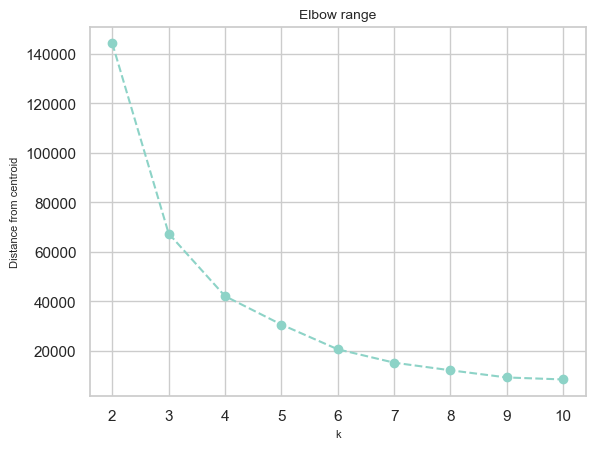

In [117]:
# plot elbow curve graph

plt.plot(range(2,11), ssd, "o--")
plt.title("Elbow range")
plt.xlabel('k')
plt.ylabel('Distance from centroid')
plt.show()

# Notes:
# The point where the rate of the decrease sharply changes is considered the optimal number of clusters (just like an elbow)
# Beyond this point adding more clusters doesn't provide much modelling benefit
# Sometimes the elbow is not very pronounced and therefore the choice of the optimal number can be subjective
# The effectiveness of the elbow method can depend on the characteristics of the data 

Here it appears the optimum no. of clusters(k) is $k=3$

### Cluster Analysis using k=3

In [118]:
# Apply scaling - dealing with distance, we'll use min/max scaler as some of the ditributions
# of the variables are not normally distributed

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_dummies)
# show the scaled obs in the first column
df_scaled[0]

array([0.66627385, 0.80874913, 0.82509202, 0.91929558, 0.76059502,
       0.35412098, 1.        , 0.        , 0.        , 0.        ,
       0.        ])

In [119]:
# fit the model and specify no of clusters you want in this case 3
k_means_model = KMeans(n_clusters=3, n_init='auto')
# fit the scaled obs to the model
k_means_model.fit(df_scaled)

C:\Users\stati\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [120]:
# labels also called response so these are the calculated values from the scaled obs
cluster_labels = k_means_model.predict(df_scaled)

In [121]:
# create a column in df_dummies called Cluster and fill with the calculated cluster labels
df_dummies['Cluster'] = cluster_labels
df_dummies

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Cluster
0,1.39651,1.34951,94.143,0.66557,0.41978,0.29678,1,0,0,0,0,0
1,1.30232,1.40223,94.784,0.62877,0.14145,0.43630,1,0,0,0,0,0
2,1.32548,1.36058,87.464,0.64938,0.48357,0.34139,1,0,0,0,0,0
3,1.45900,1.33095,88.521,0.66973,0.36503,0.34699,1,0,0,0,0,0
4,1.32629,1.32261,90.563,0.63297,0.32957,0.45811,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.35900,0.71100,61.400,0.55500,0.41100,0.21700,0,0,0,0,1,0
778,0.47600,0.88500,49.900,0.41700,0.14700,0.27600,0,0,0,0,1,0
779,0.35000,0.51700,36.100,0.00000,0.02500,0.15800,0,0,0,0,1,0
780,0.02600,0.85094,10.500,0.22500,0.03500,0.23500,0,0,0,0,1,0


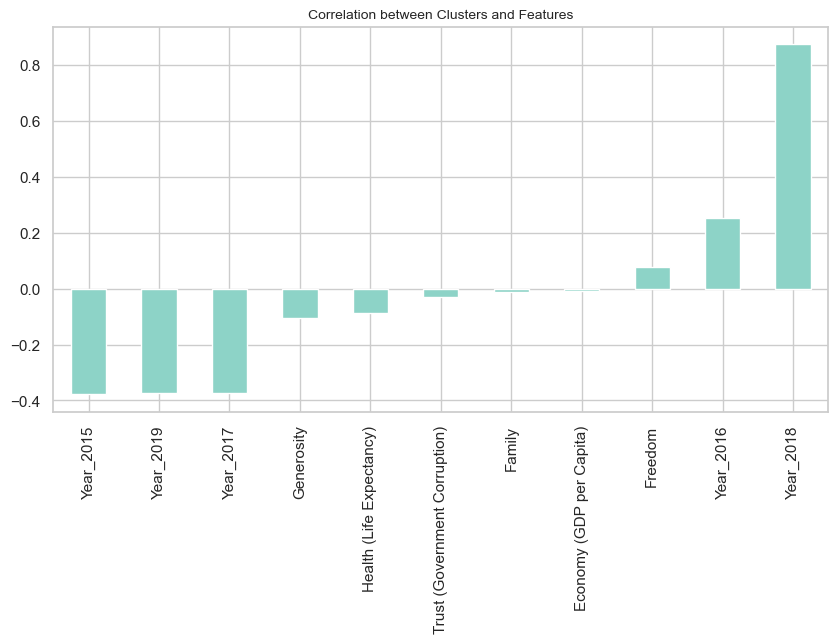

In [122]:
# See the correlation of each feature with the clusters assigned 

plt.figure(figsize=(10,5))
df_dummies.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.title('Correlation between Clusters and Features')
plt.show()


**Vaish** Please advise what to inpterpret at this stage, please? 

So what I understand this to mean is:

1. Possibly the model will do better with just 3 clusters of features. 

And the features that specifically stand out are `Year`, `Family` and possibly `Freedom` or `Generosity` as these correlated more to their assigned clusters rather than the other features available.

2. Or is this telling me that the values for these features are clustered together so if I seperated them out before putting them into the model I would get varying predictions according to which cluster I used?

What confuses me however is the `Year` feature and how this works into the interpretation of it after clustering.

Perhaps I should have used agglomerative clustering on the features columns (can you do this?) to see which features were most alike and then merge them somehow?

For now I'll go back to what I know...

### Bivariate Analysis

#### Happiness Score over the years

<Axes: title={'center': 'Happiness Score over the years'}, xlabel='Year', ylabel='Happiness Score'>

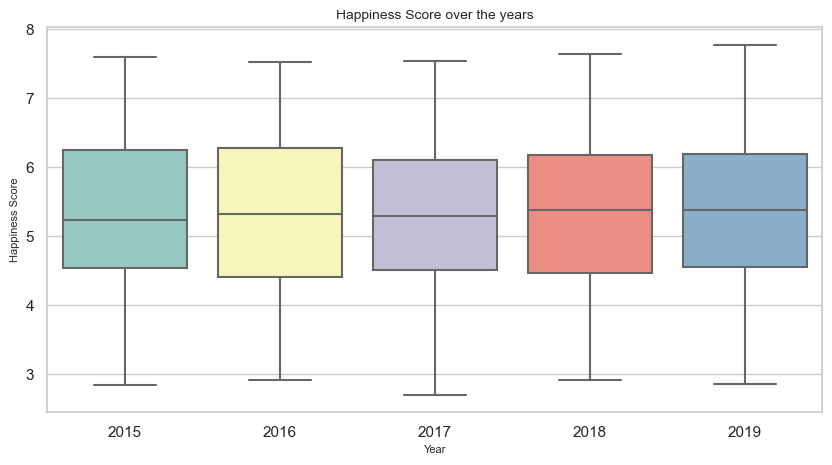

In [123]:
# comparative boxplot for Happiness Score over the years
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Happiness Score over the years')
sns.boxplot(data=df, x='Year', y='Happiness Score')
# note you can add in a hue too for other var

The graph above shows us that the ranges and medians of `Happiness Scores` are all fairly similar across the years. 

You could note that 2017 seemed to have dipped very sightly in 2017 overall but it's a very small dip. 

Based on the above I am inclined to drop the `Years` column as a feature.

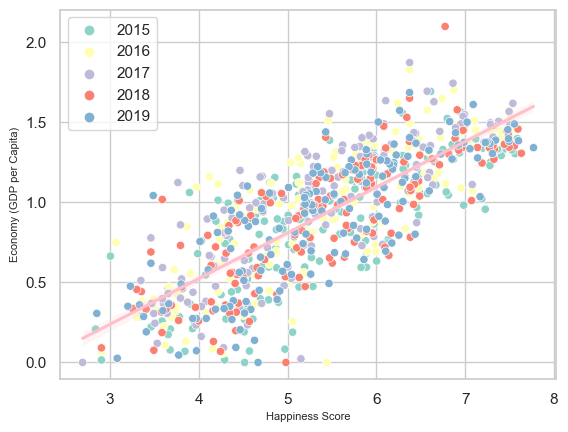

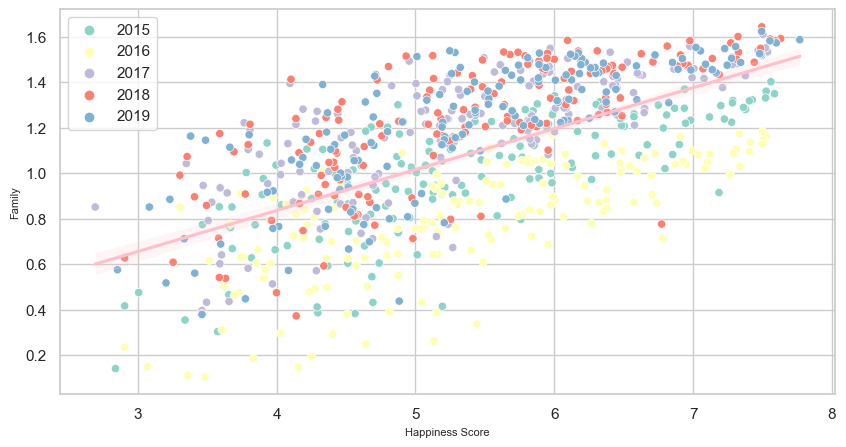

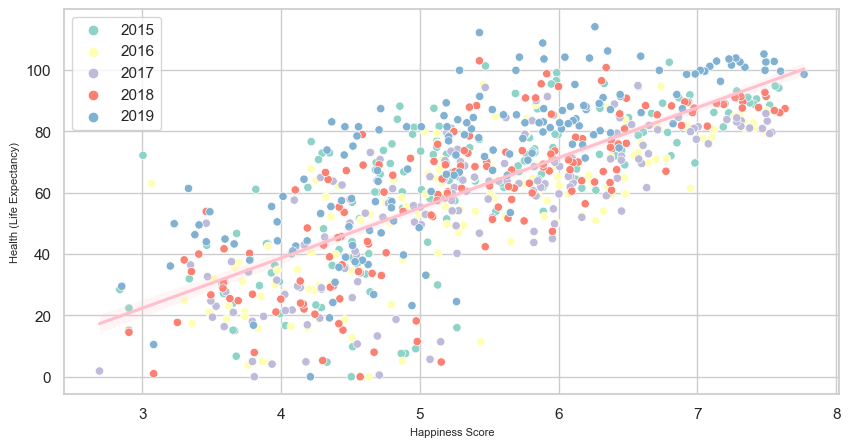

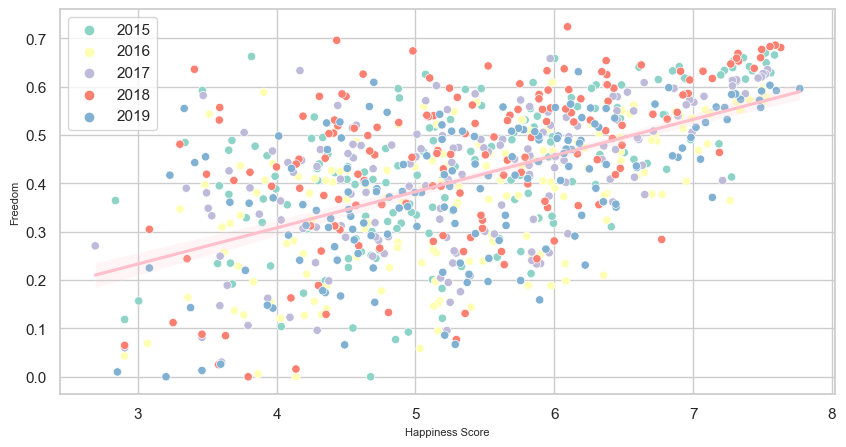

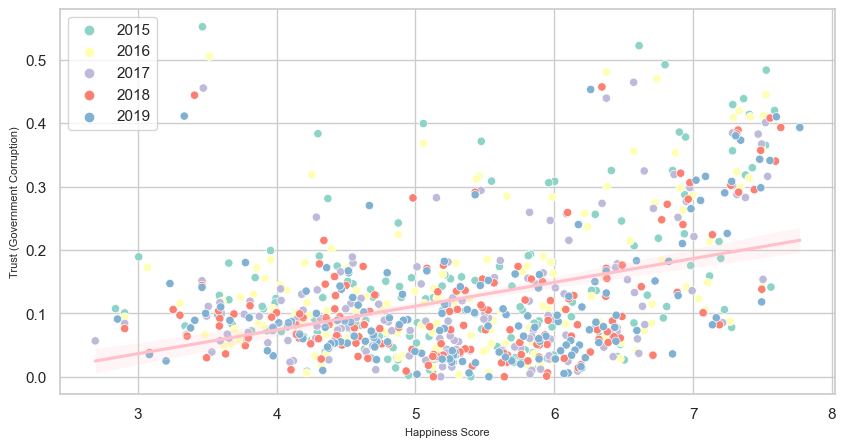

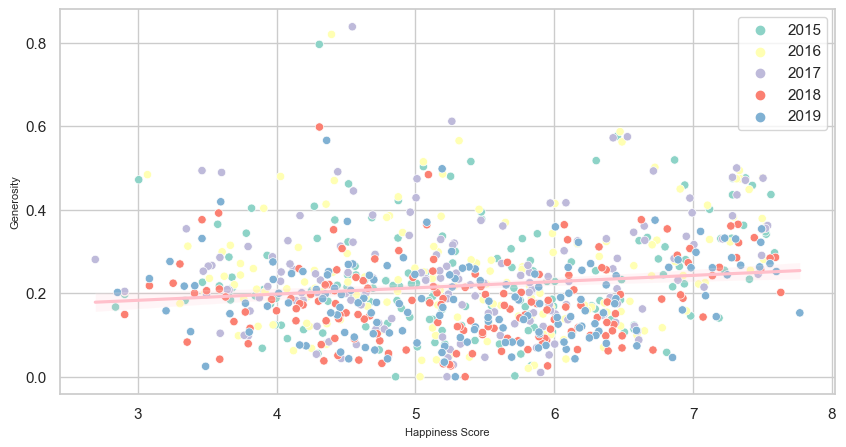

In [124]:
# define function to create scatterplots
def scatter_plots (x, y, df):
    # for loop to go through each variable, and provide counter
    for i, col in enumerate(y):
        # func to plot each var
        plt.figure(i)
        # appearance
        sns.set(rc={'font.size':10, 'axes.labelsize':8, 'axes.titlesize':10, 'figure.figsize':(10,5)})
        sns.set_theme(style='whitegrid', palette='Set3', rc=rc)
        # plot scatterplot using arguments
        ax = sns.scatterplot(x=x, y=col, data=df, hue='Year')
        # add a line of best fit
        sns.regplot(data=df, x=x, y=col, scatter=False, color='pink')
        plt.legend(loc='best')

# col names with dependant var removed (& cat var year)
y = df.columns[1:-1]
# col name of dependant var
x = df.columns[-1]

scatter_plots(x, y, df)

Here we can see there does appear to be positive linear relationship with `Happiness Score` and all the other variables. 

##### `Happiness v Family` scatterplot

The majority of family values for 2016 are in the lower values. 

And the 2017 upper end of the family values all score high happiness.

2018 & 2019 Years all seem to have recorded high family values too.

Not sure if this relates back to the clustering? **Vaish** Some feedback on this would be great!

##### `Happiness v Freedom` scatterplot

The scatter narrows at the top end of the trendline - suggesting transofrmation is required to enhance linearity for all these variable

In fact `Freedom`, `Trust`, `Health` & `Generosity` all have pretty uneven scatter, this is probably due to the skewness of the data.

Typically I would have transformed these variables by going up pr down the ladder of powers respectively, but I understand that ML algorithms can penelise for this later so I will move on.

** Vaish please advise if I have misunderstood this** 


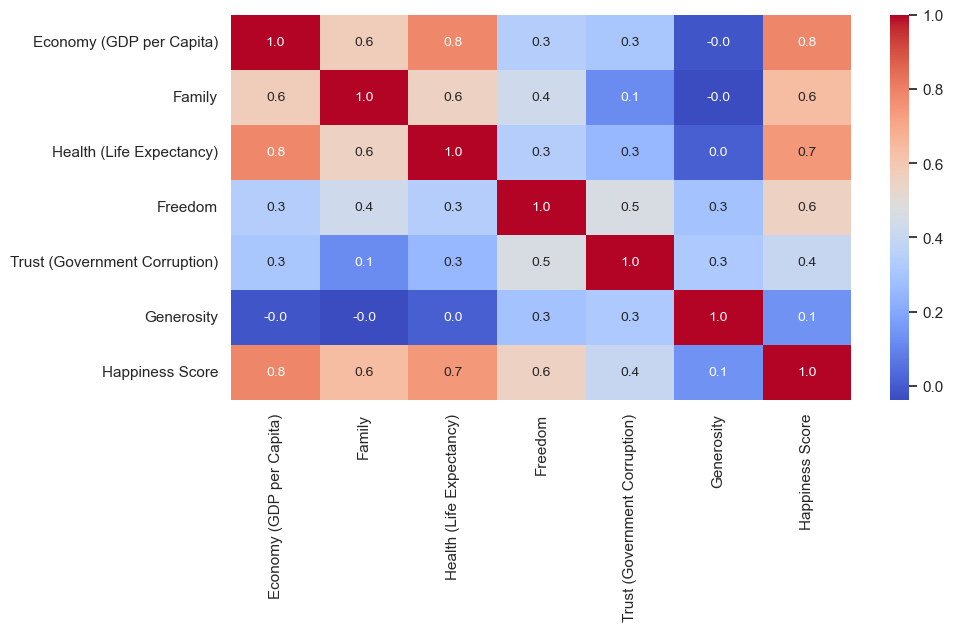

In [126]:
# draw heatmap
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt=".1f", cmap='coolwarm');

#### Multi collinearity

Here we can see `Family` is highly correlated with four other variables and it's scatter plot showed some inconsistencies earlier. And finally we also know there are still 5 remaining outliers, so based upon this, I will drop this column.

In [127]:
# dropping a column
df.drop('Family', axis=1, inplace=True)

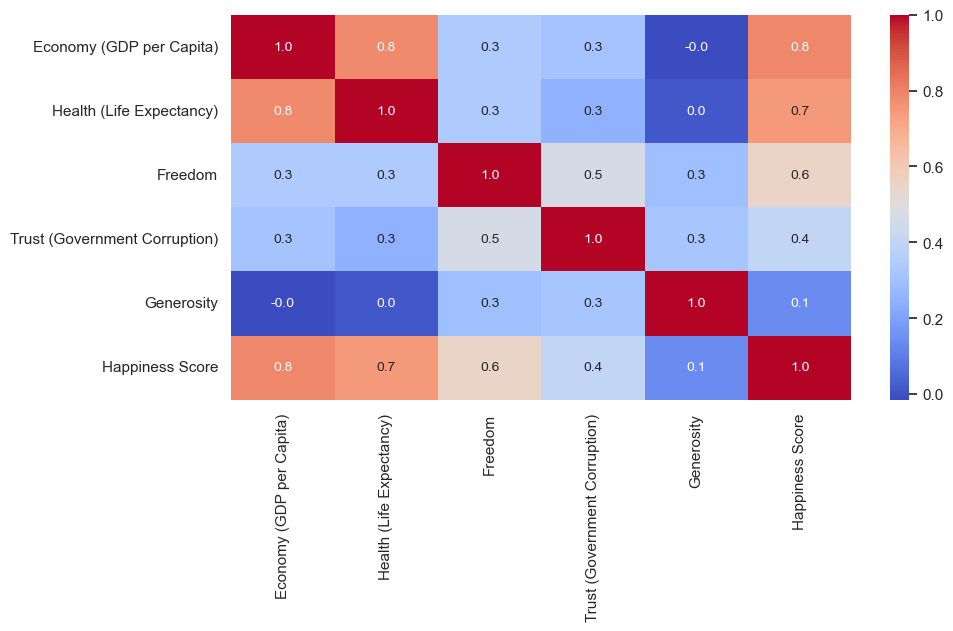

In [128]:
# draw heatmap
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt=".1f", cmap='coolwarm');

Now we can see that `Economy` and `Health (Life Expectancy`) are also strongly correlated. Combined with the fact I prefer the scatter around the `Economy` more (its more evenly distributed) and that it is slightly more correlated to the dependant variable I will drop the `Health` column.

In [129]:
# dropping a column
df.drop('Health (Life Expectancy)', axis=1, inplace=True)

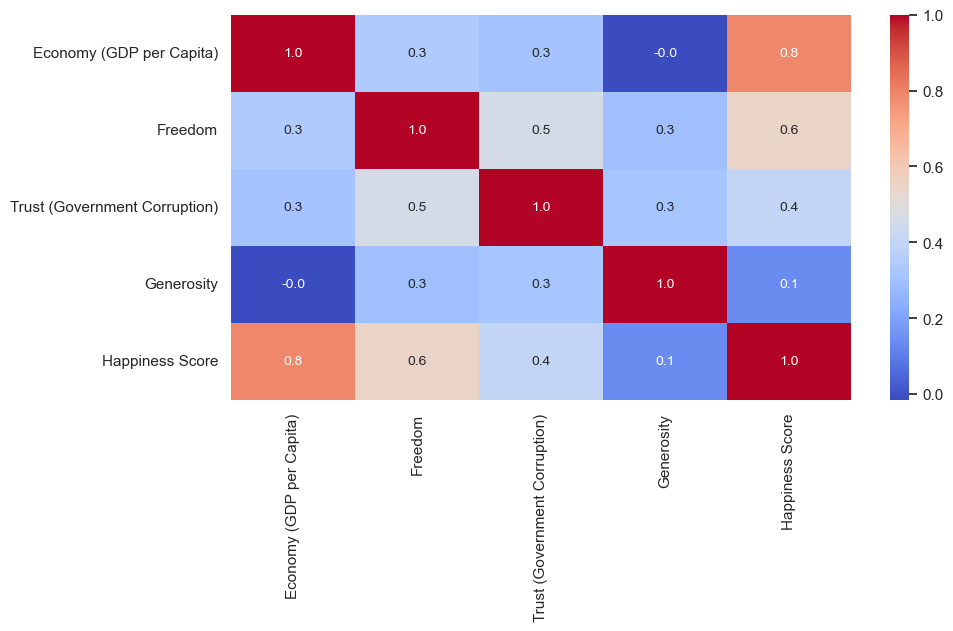

In [130]:
# draw heatmap
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt=".1f", cmap='coolwarm');

Finally we can see that `Trust` and `Freedom` are strongly correlated. Considering the scatter we saw earlier and the large no. of outliers (67). I will pick this variable to drop from my model as well.

In [131]:
# dropping a column
df.drop('Trust (Government Corruption)', axis=1, inplace=True)

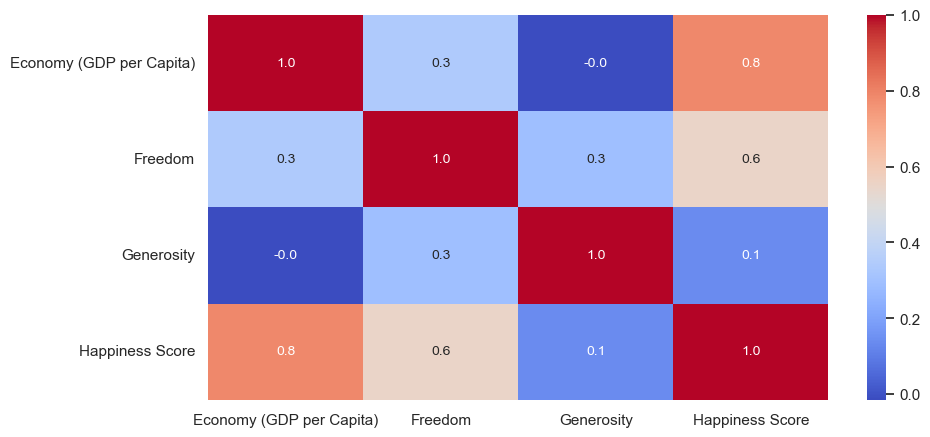

In [132]:
# draw heatmap
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.select_dtypes(['number']).corr(), annot=True, fmt=".1f", cmap='coolwarm');

Now whilst we have some variables with a smaller strength correlation strength I am happy to continue. Personally I would only drop variables which have a corr value of 0.7.

And possibly the cluster analysis suggested we only needed 3 features for our model anyway if that was how I was to interpret. 

In [133]:
# drop the `Years` column too as explained earlier
# dropping a column
df.drop('Year', axis=1, inplace=True)

df

,Economy (GDP per Capita),Freedom,Generosity,Happiness Score
0,1.39651,0.66557,0.29678,7.587
1,1.30232,0.62877,0.43630,7.561
2,1.32548,0.64938,0.34139,7.527
3,1.45900,0.66973,0.34699,7.522
4,1.32629,0.63297,0.45811,7.427
...,...,...,...,...
777,0.35900,0.55500,0.21700,3.334
778,0.47600,0.41700,0.27600,3.231
779,0.35000,0.00000,0.15800,3.203
780,0.02600,0.22500,0.23500,3.083


So I have picked my 3 features to train the model on (with the respective labels)

In [134]:
# Check if any nulls
df.isna().sum()

Economy (GDP per Capita)    0
Freedom                     0
Generosity                  0
Happiness Score             0
dtype: int64

In [135]:
# check if any encoding is needed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Economy (GDP per Capita)  782 non-null    float64
 1   Freedom                   782 non-null    float64
 2   Generosity                782 non-null    float64
 3   Happiness Score           782 non-null    float64
dtypes: float64(4)
memory usage: 24.6 KB


All variables are numerical so no further encoding is required

In [152]:
# Split the data into X and y
X = df.drop('Happiness Score', axis=1)
y = df['Happiness Score']

In [157]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choosing the best model

Using the Scikit-Learn model map the first model I will use is the Ridge Regression Model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [158]:
#import the model
from sklearn.linear_model import Ridge
# instantiate the model
rr_model = Ridge()

In [181]:
# use fit function of the model to train the ML model
rr_model.fit(X_train, y_train)

# check the score of the Ridge model on test data using the patterns the model has learned
rr_model.score(X_test, y_test)

0.6940016263564466

The model score function returns the co-eff of determination R^2 of the prediction. It compares the predictions of the model to the mean of the target var. For exmaple if all your model does is predict the mean of the targets $R^2$ would be 0 and if it perfectly predicts a range of numbers it's value would be 1. So the closer to 1 the better. If the value were negative it would be showing our model would be way off.

In [183]:
# use predictions function of the model to make predictions from test data
rr_y_preds = rr_model.predict(X_test)
# calc MAE
mean_absolute_error(y_test, rr_y_preds)

0.4909191743210443

This means that on average the model predicts values that are 0.46 away from the actual value. Its an absolute value so it removes the negatives.

In [194]:
mean_squared_error(y_test, rr_y_preds)

0.3722097565080719

This squares the errors from the mean (to get rid of the negatives again), then adds them up and takes the average. It amplifies the differences as it's squared.

Before we start fine tuning this model with it's respective hyperparameters lets take a look at the other models suggested by Scikit learn map

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [165]:
# Try SVM model
from sklearn import svm
# instantiate the model
svm_model = svm.SVR()
# use fit function of the model 
svm_model.fit(X_train, y_train)
# check the score of the model 
svm_model.score(X_test, y_test)

0.7079788696216966

In [196]:
# use predictions function of the model to make predictions from test data
svm_y_preds = svm_model.predict(X_test)
# calc MAE
mean_absolute_error(y_test, svm_y_preds), mean_squared_error(y_test, svm_y_preds)

(0.4845377870921161, 0.35520814224958247)

This is getting better but we can try other models as per the map

In [168]:
# Lets try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# instatitae the model
rfg_model = RandomForestRegressor()
# fit the model
rfg_model.fit(X_train, y_train)
# score the model
rfg_model.score(X_test, y_test)

0.7058452249816969

In [197]:
# use predictions function of the model to make predictions from test data
rfg_y_preds = rfg_model.predict(X_test)
mean_absolute_error(y_test, rfg_y_preds), mean_squared_error(y_test, rfg_y_preds)

(0.46391636393002383, 0.3578034611150813)

This means that on average the model predicts values that are 0.46 away from the actual value

We've now gotten a slightly better improved model. We could go on but to save time, we can try cross-validation on all the models we've tried

##### Evaluating the models using cross-validation

This function has cv=5 as it's default parameter. What it is doing is training the model on 5 different versions of training data and evaluating it on 5 different versions of the test data.

In [187]:
# cv score function for R^2
cross_val_score(rfg_model, X, y)

array([0.69284369, 0.73195832, 0.72478443, 0.75112329, 0.73224705])

This shows the $R^2$ for the 5 different sets of data by default as the scoring parameter for these models is $R^2$).

In [189]:
# cv score functions
cross_val_score(svm_model, X, y), cross_val_score(rr_model, X, y)

(array([0.7221422 , 0.74737567, 0.74558678, 0.75440369, 0.74012471]),
 array([0.69020568, 0.71274088, 0.72217252, 0.72968366, 0.69959394]))

In [192]:
# get the means of the cv R^2 scores
np.mean(cross_val_score(rfg_model, X, y)), np.mean(cross_val_score(svm_model, X, y)), np.mean(cross_val_score(rr_model, X, y))

(0.7286201361004268, 0.7419266099132944, 0.710879334607859)

In [200]:
# change the scoring metric to MAE (Note: if want r^2 not by default enter 'r2' for scoring parameter.)
np.mean(cross_val_score(rr_model, X, y, scoring='neg_mean_absolute_error')), np.mean(cross_val_score(svm_model, X, y, scoring='neg_mean_absolute_error')), np.mean(cross_val_score(rfg_model, X, y, scoring='neg_mean_absolute_error'))

(-0.48423908341708016, -0.45140099446526455, -0.4543757932165442)

In [201]:
# change the scoring metric to MSE
np.mean(cross_val_score(rr_model, X, y, scoring='neg_mean_squared_error')), np.mean(cross_val_score(svm_model, X, y, scoring='neg_mean_squared_error')), np.mean(cross_val_score(rfg_model, X, y, scoring='neg_mean_squared_error'))

(-0.36680890359360735, -0.32748185025016924, -0.3427360694356138)

Here we can see the SVM model actually scores consistently better across the board. So I will choose the SVM model as my model.

### Improving the model

In [202]:
# get the hyperparameters of the model
svm_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Looking at the Scikit literature:

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

Proper choice of C and gamma is critical to the SVM’s performance. One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

So I will choose these two to adjust

In [207]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100]
    }

In [210]:
# Create GridSearchCV object
grid_search_r2 = GridSearchCV(svm_model, param_grid, cv=5, scoring='r2')
grid_search_MAE = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_MSE = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search on the dataset
grid_search_r2.fit(X, y)
grid_search_MAE.fit(X,y)
grid_search_MSE.fit(X,y)

# Print the best parameters and the best score
print("Best Parameters for $R^2$:", grid_search_r2.best_params_)
print("Best $R^2$:", grid_search_r2.best_score_)

print("Best Parameters for MAE:", grid_search_MAE.best_params_)
print("Best Score for MAE:", grid_search_MAE.best_score_)

print("Best Parameters for MSE:", grid_search_MSE.best_params_)
print("Best Score for MSE:", grid_search_MSE.best_score_)

Best Parameters for $R^2$: {'C': 1, 'gamma': 10}
Best $R^2$: 0.7555950196295489
Best Parameters for MAE: {'C': 10, 'gamma': 10}
Best Score for MAE: -0.42671069234753123
Best Parameters for MSE: {'C': 1, 'gamma': 10}
Best Score for MSE: -0.3103281094454754


Seeing as how the MSE & $R^2$ are better when C is 1 and gamme is 10. I would choose this model as a small difference to the score is actually quite a big thing.

So this is the model I would use...

FIN!